In [1]:
import numpy as np 
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import plotly.express as px
import plotly.graph_objects as go


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx


In [3]:
election_df=pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
election_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
election_df.info()
# Checking For Null Values 
election_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [5]:
election_df.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
election_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

In [6]:
#election_df.loc[election_df['SYMBOL'].isnull()==True,['NAME'] ] = 0
election_df[election_df['SYMBOL'].isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

In [7]:
# Clean the ASSETS and LIABILITIES col which has input like below:
# Rs 30,99,414
# ~ 30 Lacs+
def data_cleaner(x):
    try:
        x = x.split('\n')[0]
        x = x.replace('Rs', '')
        x = x.replace(',', '')
        x = x.strip()
        return int(x)
    except:
        x = 0
        return int(x)
    
election_df['ASSETS'] = election_df['ASSETS'].apply((data_cleaner))
election_df['LIABILITIES'] = election_df['LIABILITIES'].apply((data_cleaner))
election_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [8]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

In [9]:
election_df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [10]:
election_df['EDUCATION'].replace({'Post Graduate\n':'Post Graduate'},inplace=True)
election_df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

In [11]:
election_df[election_df['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


In [12]:
election_df['ASSETS']=pd.to_numeric(election_df['ASSETS'])
election_df['LIABILITIES']=pd.to_numeric(election_df['LIABILITIES'])
election_df['CRIMINAL CASES'].replace({np.NaN:0})
election_df['CRIMINAL CASES'] = pd.to_numeric(election_df['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

In [13]:
election_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [14]:
state_const = election_df.groupby(['STATE']).apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='# Constituency')
#state_shp = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
#shp_state_joined = state_shp.set_index('st_nm').join(state_const.set_index('STATE'))

#fig, ax = plt.subplots(1, figsize=(10, 10))
#ax.axis('off')
#ax.set_title('State-wise Distribution of Indian Constituencies',
#             fontdict={'fontsize': '15', 'fontweight' : '3'})
#fig = shp_state_joined.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

state_const.sort_values(by='# Constituency',ascending=False,inplace=True)
fig2 = px.bar(state_const, x='STATE', y='# Constituency',
                     color='# Constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',template='plotly_white')
fig2.show()

In [15]:
# Percentage of Voting by State

df_votes_perct_constituency = election_df.groupby(['STATE','CONSTITUENCY','TOTAL ELECTORS'])['TOTAL VOTES'].sum().reset_index()
df_votes_perct_constituency['% VOTED IN CONSTITUENCY'] = round(df_votes_perct_constituency['TOTAL VOTES']*100/df_votes_perct_constituency['TOTAL ELECTORS'],2)
df_voters_state = election_df[['STATE','CONSTITUENCY','TOTAL ELECTORS']].drop_duplicates()
df_voters_state = df_voters_state.groupby('STATE')['TOTAL ELECTORS'].sum().reset_index()
df_votes_state = election_df.groupby('STATE')['TOTAL VOTES'].sum().reset_index().sort_values('TOTAL VOTES',ascending = False)
df_votes_perct_state = pd.merge(df_votes_state,df_voters_state, on ='STATE',how = 'left')
df_votes_perct_state['% VOTED IN STATE'] = round(df_votes_perct_state['TOTAL VOTES']*100/df_votes_perct_state['TOTAL ELECTORS'],2)
df_votes_perct_state = df_votes_perct_state.sort_values('% VOTED IN STATE',ascending = False)
fig = px.bar(df_votes_perct_state, x='STATE', y='% VOTED IN STATE', color='% VOTED IN STATE', height=600, width=800)
fig.update_layout(title_text='Statewise distribution of voting percentage all over India',template='plotly_dark')
fig.show()

In [16]:
# Which Parties have been present in most constituencies and States?

vote_prty=election_df[election_df['PARTY']!='NOTA']
prty_cnt=vote_prty.groupby('PARTY').apply(lambda x:x['CONSTITUENCY'].count()).reset_index(name='# Constituency')
prty_st=vote_prty.groupby('PARTY').apply(lambda x:x['STATE'].nunique()).reset_index(name='# State')
prty_cnt.sort_values(by='# Constituency',ascending=False,inplace=True)
prty_top_cn=prty_cnt[:20]
prty_top_all=pd.merge(prty_top_cn,prty_st,how='inner',left_on='PARTY',right_on='PARTY')
#fig = px.scatter(prty_top_all, x='# Constituency', y='# State', color='# State',
#                 size='# Constituency', hover_data=['PARTY'])
fig = px.bar(prty_top_all, x='PARTY', y='# Constituency',
                     color='# State',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Constituency vs Statewise participation for the most contesting Political Parties',template='ggplot2')
fig.show()

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

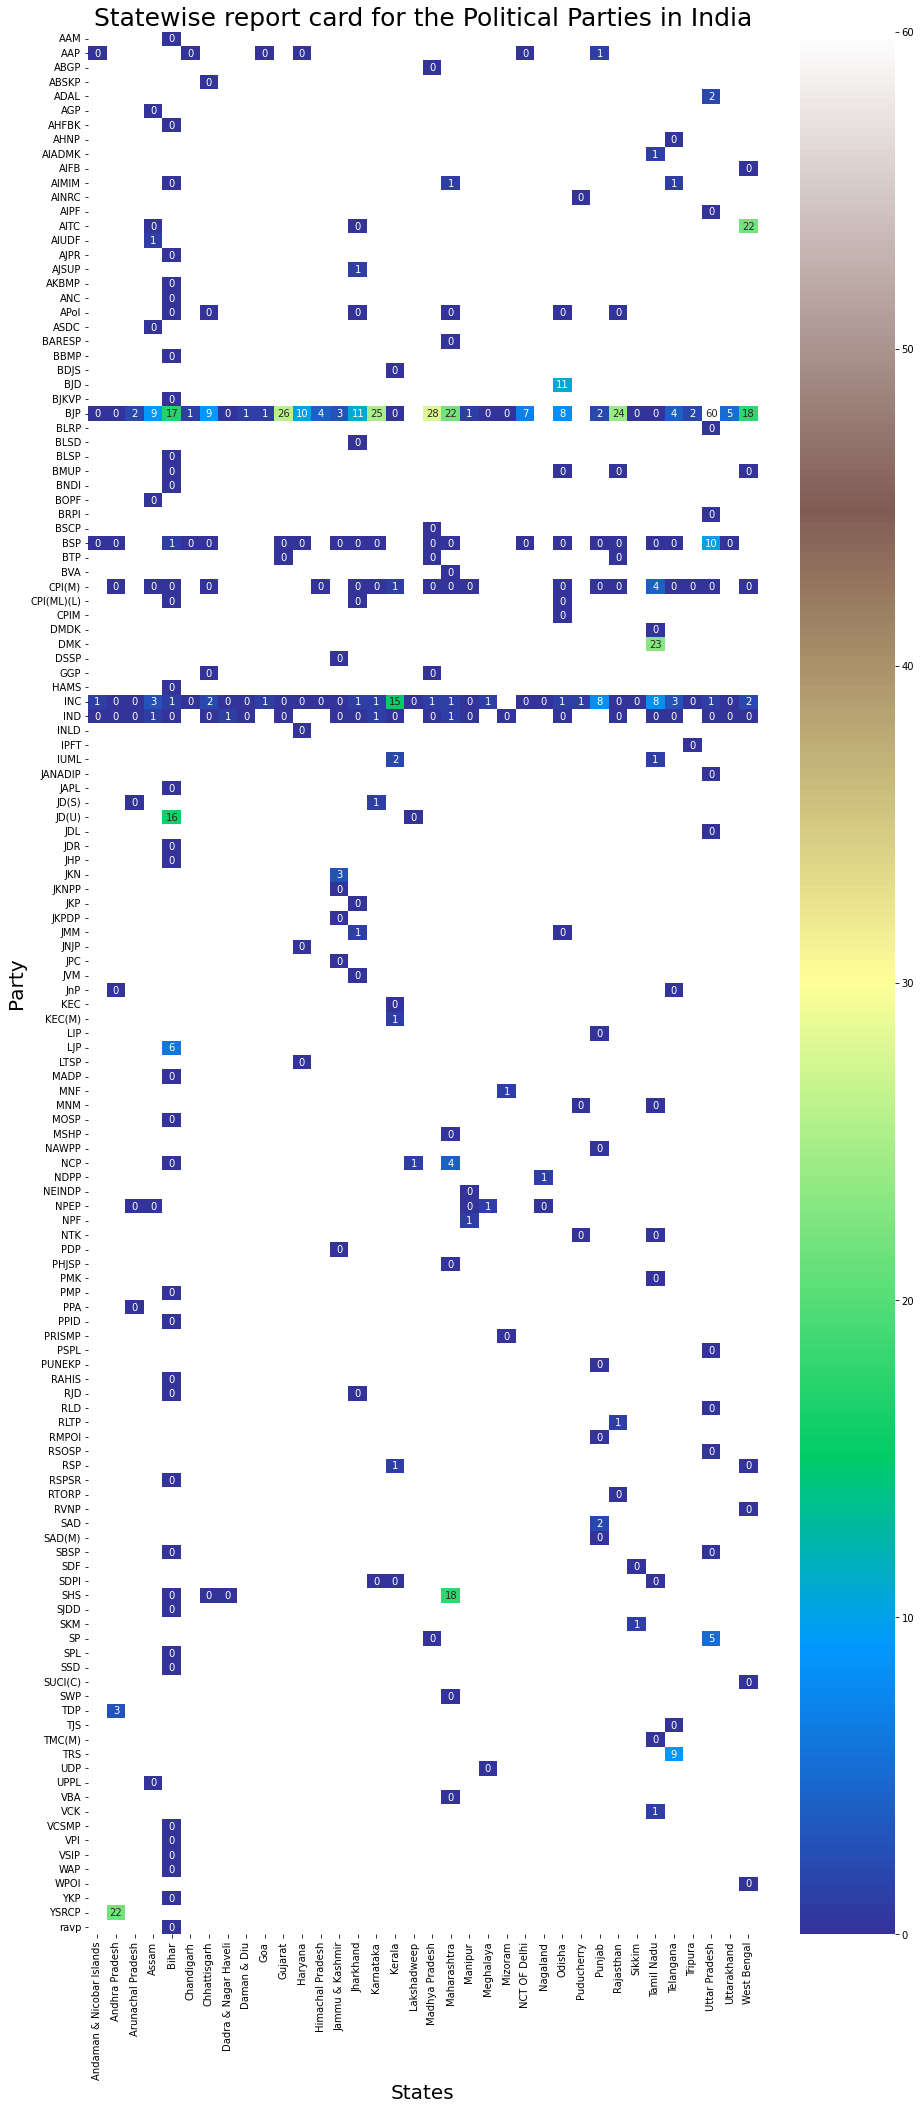

In [17]:
#What has been the performance of the Parties Statewise?

st_prty=vote_prty.groupby(['PARTY','STATE']).apply(lambda x:x['WINNER'].sum()).reset_index(name='Wins')
pvt_st_prty=pd.pivot(st_prty,index='PARTY',columns='STATE',values='Wins')
plt.figure(figsize=(15,35))
sns.heatmap(pvt_st_prty,annot=True,fmt='g',cmap='terrain')
#fig = px.imshow(pvt_st_prty, text_auto=True, aspect="auto")
#fig.show()
plt.xlabel('States',size=20)
plt.ylabel('Party',size=20)
plt.title('Statewise report card for the Political Parties in India',size=25)

In [18]:
# Which party has won the most constituencies?

part_win=election_df.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
top_part_win=part_win[0:15]
fig = px.bar(top_part_win, x='PARTY', y='# Wins',
                     color='# Wins',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Win Counts by a Political Party in 2019',template='plotly_white')
fig.show()

In [19]:
# Party Wise vote share

vote_share_top5 = election_df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(10).index.tolist()


def vote_share(row):
    if row['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return row['PARTY']
election_df['Party New'] = election_df.apply(vote_share,axis =1)
counts = election_df.groupby('Party New')['TOTAL VOTES'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
fig.show()

In [20]:
# What has been the general Win vs Loss relationship for the Parties in 2019?

prty_cnt_win=pd.merge(prty_cnt,part_win,how='inner',left_on='PARTY',right_on='PARTY')
prty_cnt_win['Lost']=prty_cnt_win['# Constituency']-prty_cnt_win['# Wins']
prty_wins_cnt=prty_cnt_win[['PARTY','# Wins']]
prty_wins_cnt['Verdict']='Constituency Won'
prty_loss_cnt=prty_cnt_win[['PARTY','Lost']]
prty_loss_cnt['Verdict']='Constituency Lost'
prty_wins_cnt.columns=['Party','Counts','Verdict']
prty_loss_cnt.columns=['Party','Counts','Verdict']
top_prty_wins_cnt=prty_wins_cnt[:15]
prty_loss_cnt_cnt=prty_loss_cnt[:15]
prt_win_loss=pd.concat([top_prty_wins_cnt,prty_loss_cnt_cnt])
fig = px.bar(prt_win_loss, x='Party', y='Counts', color='Verdict')
fig.update_layout(title_text='Win vs Loss Analysis for the Top Parties',template='plotly_dark')
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# What is the Gender Ratio of the Contestants? Also the Gender Ratio of the Winners?

vote_gndr=election_df[election_df['PARTY']!='NOTA']
gndr_overall=vote_gndr.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_overall['Category']='Overall Gender Ratio'
winners=vote_gndr[vote_gndr['WINNER']==1]
gndr_winner=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category']='Winning Gender Ratio'
gndr_overl_win=pd.concat([gndr_winner,gndr_overall])
fig = px.bar(gndr_overl_win, x='GENDER', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts analysis for the Genders',template='seaborn')
fig.show()

In [22]:
# What is the Educational Qualification of our politicians?

ed_valid=election_df[election_df['PARTY']!="NOTA"]
ed_cnt=ed_valid.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig = go.Figure(data=[go.Pie(labels=ed_cnt['EDUCATION'], values=ed_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.2, 0,0.1, 0.2, 0.1])])
fig.update_layout(title_text='Overall Education Qualification of all the Nominees',template='plotly_white')
fig.show()
ed_won=ed_valid[ed_valid['WINNER']==1]
ed_win_cnt=ed_won.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['EDUCATION'], values=ed_win_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners',template='plotly_white')
fig2.show()

In [23]:
# What is the relationship of Age and Politics?

age_cnt=ed_valid.groupby(['AGE','GENDER']).apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(age_cnt, x="AGE",y='Counts',color='GENDER',title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the politicians',template='plotly_white')
fig.show()

In [24]:
# What relation does the Politician category have with the election results?


vote_cat=election_df[election_df['PARTY']!='NOTA']
cat_overall=vote_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_overall['Category']='Overall Category Counts'
winners_cat=vote_gndr[vote_gndr['WINNER']==1]
cat_winner=winners_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_winner['Category']='Winning Category Ratio'
cat_overl_win=pd.concat([cat_winner,cat_overall])
fig = px.bar(cat_overl_win, x='CATEGORY', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts for the Category in Politics',template='plotly_white')
fig.show()

In [25]:
# Have the politicians been involved with criminal activities?

crim_cnt=ed_valid.groupby('CRIMINAL CASES').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(crim_cnt, x='CRIMINAL CASES',y='Counts',marginal='violin')
fig.update_layout(title_text='Criminal Cases Counts Distribution among the politicians',template='plotly_white')
fig.show()

In [26]:
# Candidate and Winner Assets

#Candidates
df_assets = pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
df_assets[['ASSETS2','ASSETS_VALUE']] = df_assets['ASSETS'].str.split('~',expand=True)
df_assets.drop(['ASSETS2'],axis =1,inplace=True)
df_assets = df_assets[df_assets['ASSETS_VALUE'].notnull()]
def asset_range(row):
    if row['ASSETS_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['ASSETS_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['ASSETS_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'

df_assets['ASSETS_RANGE'] = df_assets.apply(asset_range,axis =1)
df_assets['COUNT'] = 1
df_assets = df_assets[df_assets['ASSETS_RANGE'] != 'NAN']
counts = df_assets.groupby('ASSETS_RANGE')['COUNT'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Assests of Candidates')
fig = go.Figure(data=[pie], layout=layout)
fig.show()



# Winners
df_assets = pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
df_assets[['ASSETS2','ASSETS_VALUE']] = df_assets['ASSETS'].str.split('~',expand=True)
df_assets.drop(['ASSETS2'],axis =1,inplace=True)
df_assets = df_assets[df_assets['ASSETS_VALUE'].notnull()]
def asset_range(row):
    if row['ASSETS_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['ASSETS_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['ASSETS_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'

df_assets['ASSETS_RANGE'] = df_assets.apply(asset_range,axis =1)
df_assets['COUNT'] = 1
df_assets = df_assets[df_assets['ASSETS_RANGE'] != 'NAN']
df_assets = df_assets[df_assets['WINNER'] == 1]
counts = df_assets.groupby('ASSETS_RANGE')['COUNT'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Assests of Winners')
fig = go.Figure(data=[pie], layout=layout)
fig.show()

In [27]:
# Category wise Candidates
df_category = election_df['CATEGORY'].value_counts().reset_index()
df_category.columns = ['CATEGORY','COUNT']
fig = px.bar(df_category, x='CATEGORY', y='COUNT', color='CATEGORY', height=500, title="Category wise Candidates")
fig.show()


# Category wise winners
df_gender_won =election_df[election_df['WINNER'] == 1]
df_category = df_gender_won['CATEGORY'].value_counts().reset_index()
df_category.columns = ['CATEGORY','COUNT']
fig = px.bar(df_category, x='CATEGORY', y='COUNT', color='CATEGORY', height=500, title="Category wise winners")
fig.show()